In [23]:
from ipfx_new.ipfx_new.x_to_nwb import ABFConverter
ABFConverter.ABFConverter('examples/Cell1/18823042.abf', 'output/18823042.nwb', includeChannelList=["OUT 1"])

In [24]:
# Load IPFX libraries
from ipfx.dataset.create import create_ephys_data_set
from ipfx.data_set_features import extract_data_set_features
from ipfx.utilities import drop_failed_sweeps
from ipfx.qc_feature_extractor import sweep_qc_features

# Load pandas library too
import pandas as pd
from ipfx.dataset.create import create_ephys_data_set
from ipfx.utilities import drop_failed_sweeps

file_name = "output/18823042.nwb"

# Create Ephys Data Set

print('loading dataset into data structure...')
#nwb_file_name = '/Users/stripathy/Downloads/sub-601462951_ses-601810292_icephys.nwb'
data_set = create_ephys_data_set(nwb_file=file_name, ontology="ipfx/ipfx/defaults/stimulus_ontology.json") ##loads nwb file into ipfx data structure

#sweep = data_set.sweep(0)
# sweep_features = sweep_qc_features(data_set)
# Drop failed sweeps: sweeps with incomplete recording or failing QC criteria
drop_failed_sweeps(data_set)
# ipfx.data_set_features.extract_data_set_features(data_set, subthresh_min_amp=None)[source]

loading dataset into data structure...


ValueError: Found multiple stimulus series {[s.name for s in matching_series]} for sweep number {sweep_number}

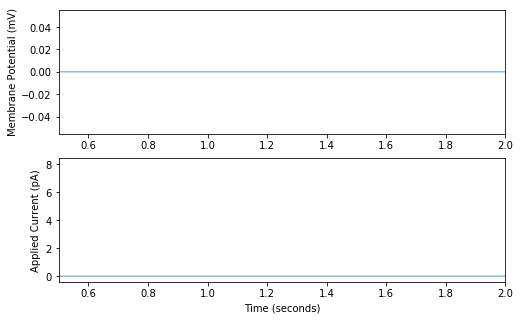

In [5]:
### Import statements
import pyabf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# refers to example_datasets folder in github repo
file_rel_path = 'examples/Cell1/'

curr_file = '18823042.abf'
abf_file_path = file_rel_path + curr_file

abf = pyabf.ABF(abf_file_path) # this is the basic function for accessing abf files

### Configuration variables
stim_channel_num = 1 # on which channel number is the stimulus?
response_chan_num = 1 # on which channel number is the response?

stim_gain = 1 # integer gain on stimulus
response_gain = 0 # integer gain on response

stim_end = 2 # time point where stimulus ends

sweep_plot_list = [11] # sweeps we want to plot
fig = plt.figure(figsize=(8, 5))

### Figure plotting
for i in sweep_plot_list:
    sweep_num = i
    
    # this setSweep command sets the currently active sweep in the file
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    abf.setSweep(sweep_num, channel=stim_channel_num)
    ax2 = fig.add_subplot(212, sharex=ax1)  
    #abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0.5, stim_end)  # <-- adjust axis like this
plt.show()